<a href="https://colab.research.google.com/github/Viniciusalgueiro/Studing_Deep_learning/blob/main/Identenficacao_de_imagens_com_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importaçao de Bibliotecas**

In [1]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np


# **Dataset**

In [2]:
dataset = keras.datasets.fashion_mnist

In [3]:
((imagens_treino, identificacoes_treino),(imagens_teste,identificacoes_teste))= dataset.load_data( )

In [4]:
len(identificacoes_treino),imagens_treino.shape
#imagens_teste.shape

(60000, (60000, 28, 28))

Text(0.5, 1.0, '9')

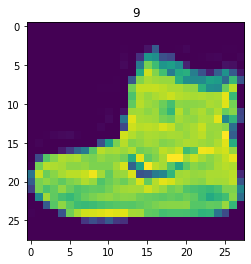

In [5]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [6]:
identificacoes_treino.min(),identificacoes_treino.max()
total_de_classificacoes = 10

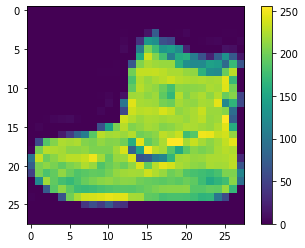

In [7]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

# **Exploraçao dos dados**

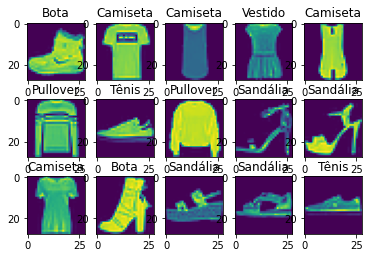

In [8]:
for imagem in range(15):
  plt.subplot(3,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

#Normalizaçao das Imagens


In [15]:
imagens_treino = imagens_treino/float(255)


modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation=tensorflow.nn.softmax)                             
])

modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino,epochs = 30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 13s 8ms/step - loss: 1.0823 - accuracy: 0.6522 - val_loss: 0.6973 - val_accuracy: 0.7431
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6574 - accuracy: 0.7622 - val_loss: 0.5890 - val_accuracy: 0.7861
Epoch 3/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5809 - accuracy: 0.7899 - val_loss: 0.5356 - val_accuracy: 0.8064
Epoch 4/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5359 - accuracy: 0.8074 - val_loss: 0.5052 - val_accuracy: 0.8196
Epoch 5/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5036 - accuracy: 0.8206 - val_loss: 0.4789 - val_accuracy: 0.8276
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4807 - accuracy: 0.8287 - val_loss: 0.4646 - val_accuracy: 0.8300
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4638 - accuracy: 0.8341 - val_loss: 0.4481 - val_accuracy

# Salvando e carregando o Modelo

In [21]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Plotando o grafico de acuracia

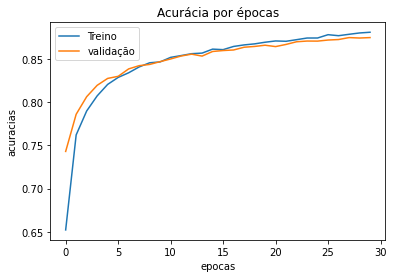

In [17]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('epocas')
plt.ylabel('acuracias') 
plt.legend(['Treino','validação'])

# Visualizando as perdas por epocas 

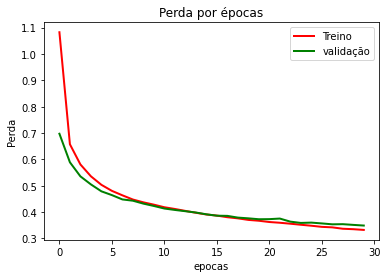

In [16]:
plt.plot(historico.history['loss'],color = 'red',linewidth=2)
plt.plot(historico.history['val_loss'],color = 'Green',linewidth=2)
plt.title('Perda por épocas')
plt.xlabel('epocas')
plt.ylabel('Perda') 
plt.legend(['Treino','validação'])

**Testando o modelo e o modelo salvo**

In [27]:
teste = modelo.predict(imagens_teste)
print('resultado teste:',np.argmax(teste[3]))
print('Número da imagem de teste:',identificacoes_teste[3])

resultado teste: 1
Número da imagem de teste: 1


In [26]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[3]))
print('numero da imagem de teste:',identificacoes_teste[3])

resultado teste modelo salvo: 1
numero da imagem de teste: 1


Avaliando o modelo

In [28]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste', perda_teste)
print('Acuracia do teste', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 15847.8945 - accuracy: 0.7775
Perda do teste 15847.89453125
Acuracia do teste 0.7774999737739563
